In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('/content/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           213 non-null    float64
 3   ssc_b           213 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           208 non-null    object 
 7   degree_p        208 non-null    float64
 8   degree_t        208 non-null    object 
 9   workex          208 non-null    object 
 10  etest_p         213 non-null    float64
 11  specialisation  213 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:

df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,213.000000,215.000000,208.000000,213.000000,215.000000,148.000000
mean,108.000000,67.409531,66.333163,66.269663,72.110892,62.278186,288655.405405
std,62.209324,10.815114,10.897509,7.176998,13.309323,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,61.000000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,76.000000,73.000000,72.000000,84.000000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,85.000000,98.000000,77.890000,940000.000000


In [ ]:
# identify missing values remains
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,2
ssc_b,2
hsc_p,0
hsc_b,0
hsc_s,7
degree_p,7
degree_t,7
workex,7


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

In [ ]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
# Target
Y = df['salary']

# Features (excluding ID and target columns)
X = df.drop(columns=['sl_no', 'status', 'salary'])

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# labelencoder = LabelEncoder()
# for col in categorical_cols:
#     X[col] = labelencoder.fit_transform(X[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bound: 201250.0
Upper bound: 331250.0


In [ ]:
df_no_outliers = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

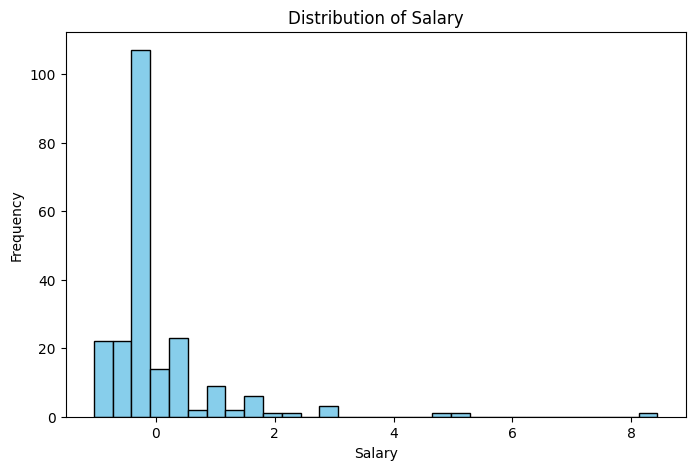

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


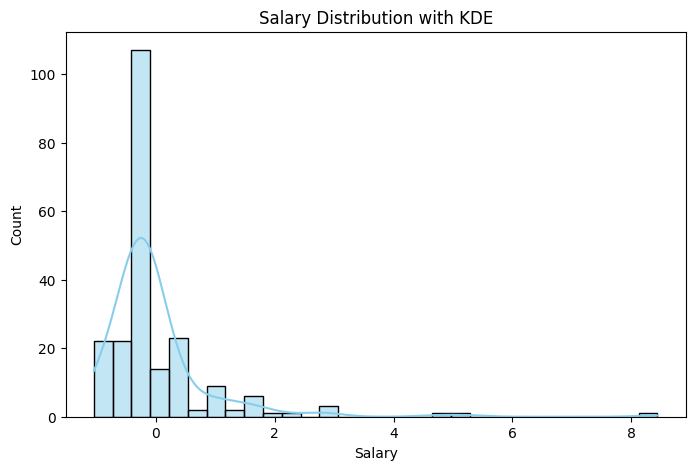

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['salary'], bins=30, kde=True, color='skyblue')
plt.title('Salary Distribution with KDE')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()


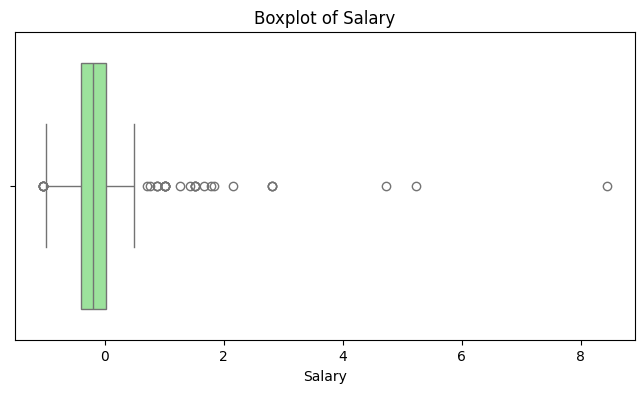

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['salary'], color='lightgreen')
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()


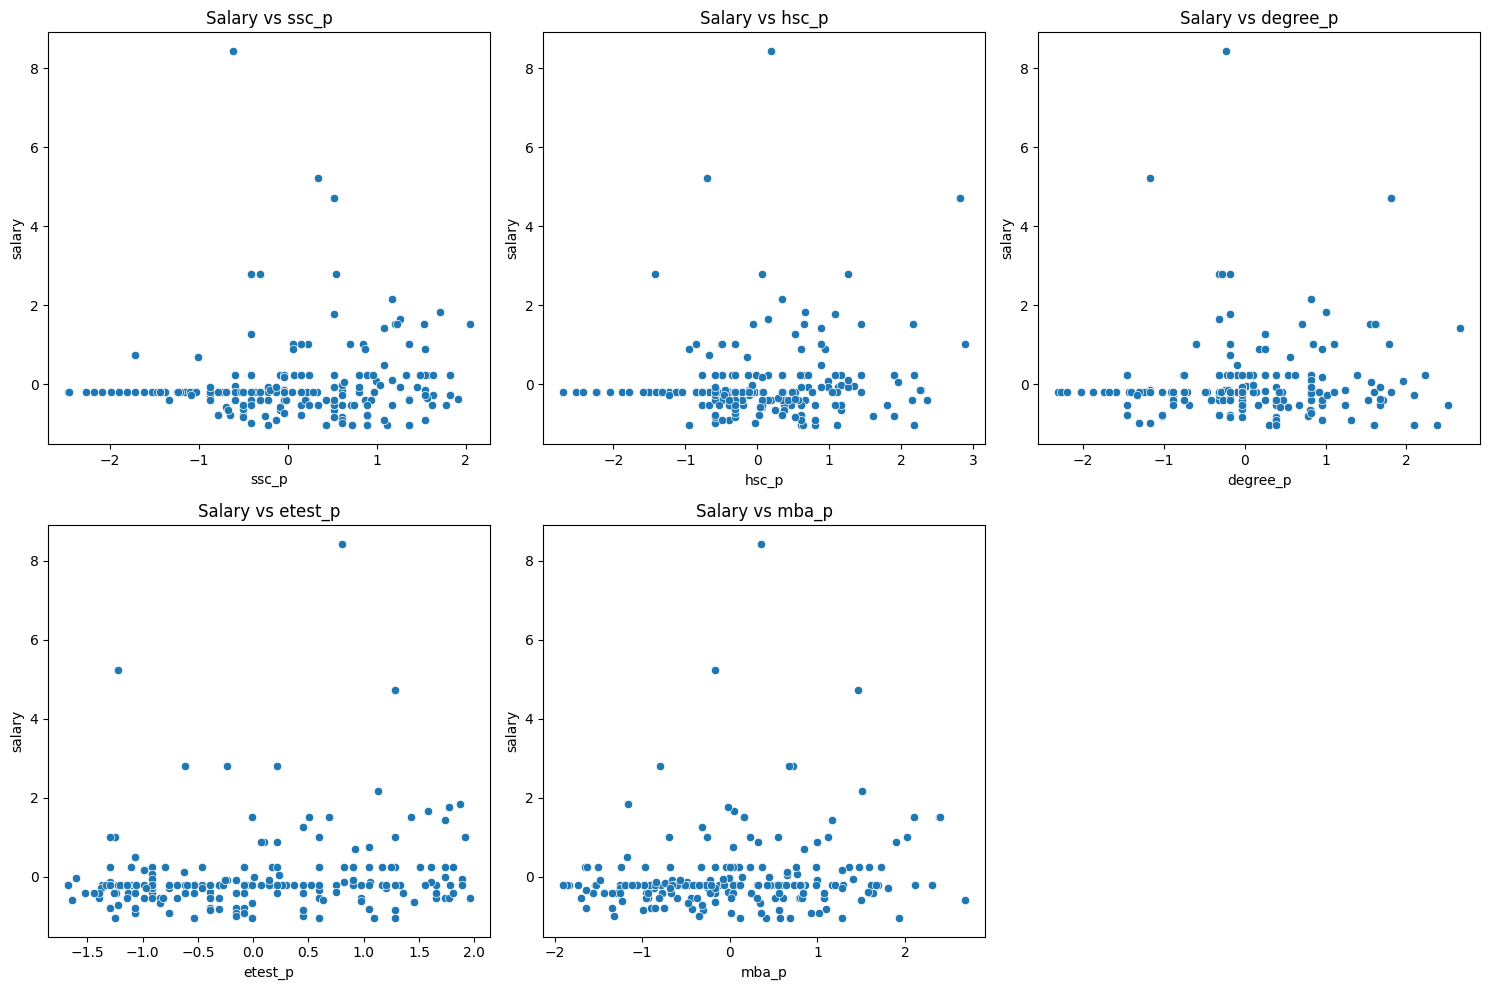

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']  # example numeric features

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['salary'])
    plt.title(f'Salary vs {col}')
plt.tight_layout()
plt.show()



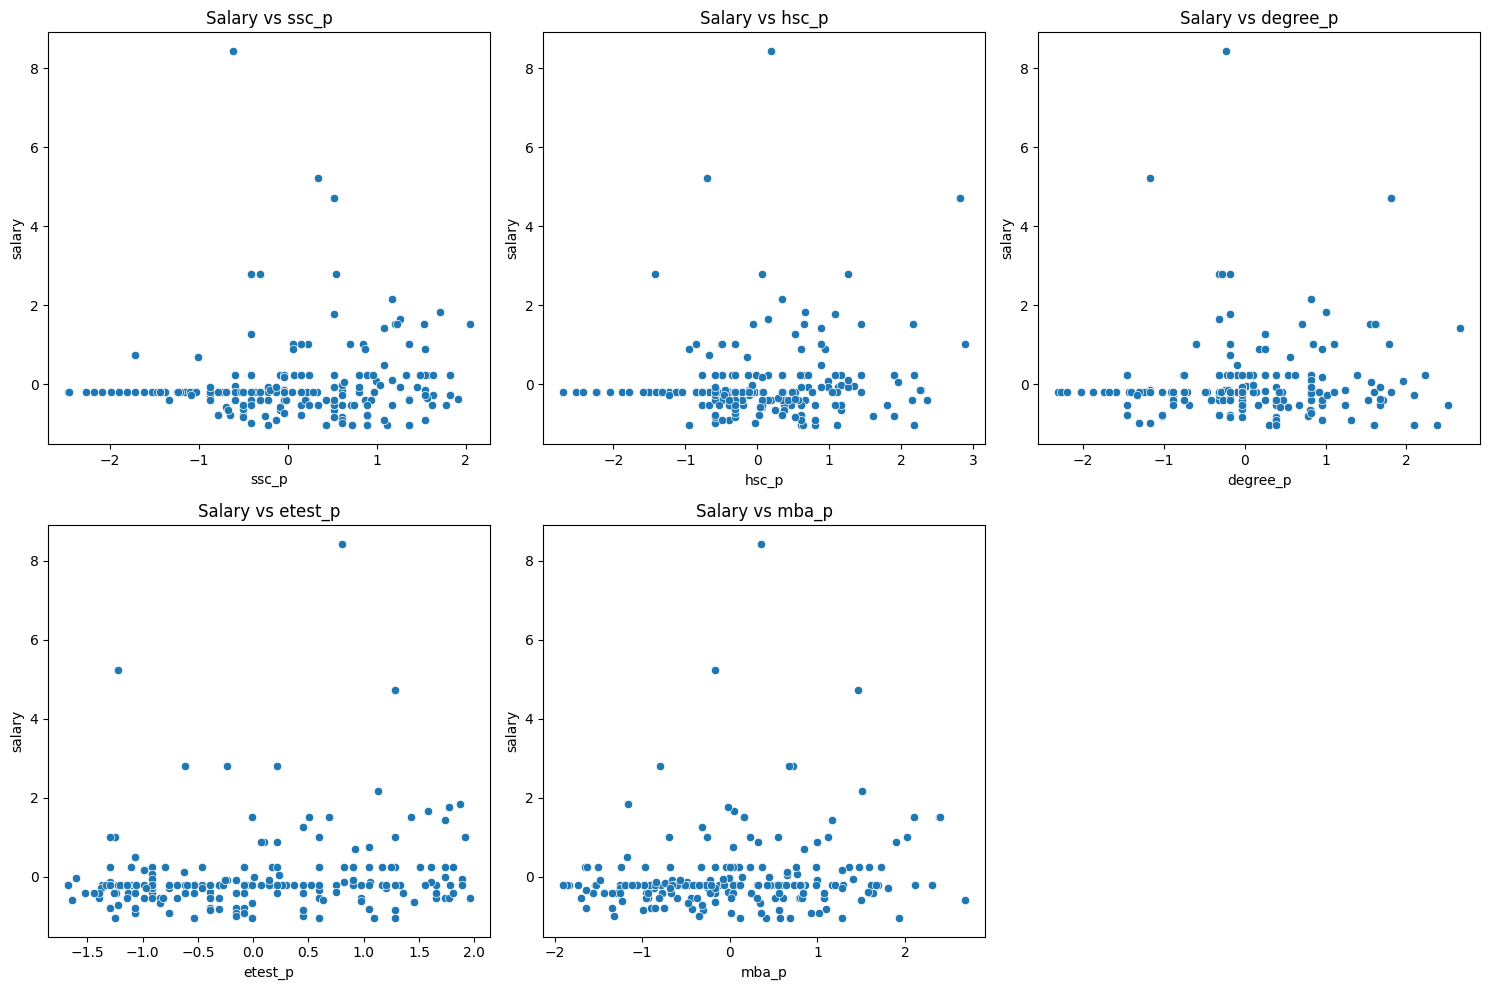

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']  # example numeric features

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['salary'])
    plt.title(f'Salary vs {col}')
plt.tight_layout()
plt.show()


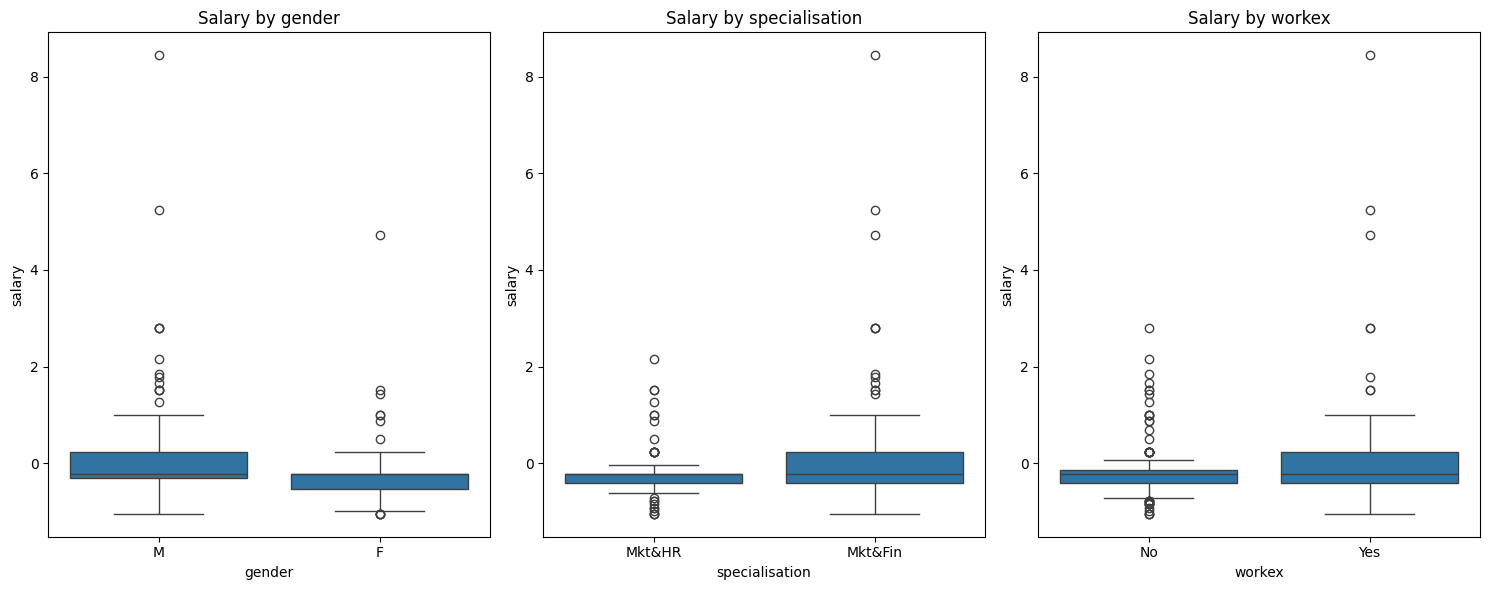

In [ ]:
categorical_cols = ['gender', 'specialisation', 'workex']  # example categorical features

plt.figure(figsize=(15,6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.boxplot(x=df[col], y=df['salary'])
    plt.title(f'Salary by {col}')
plt.tight_layout()
plt.show()


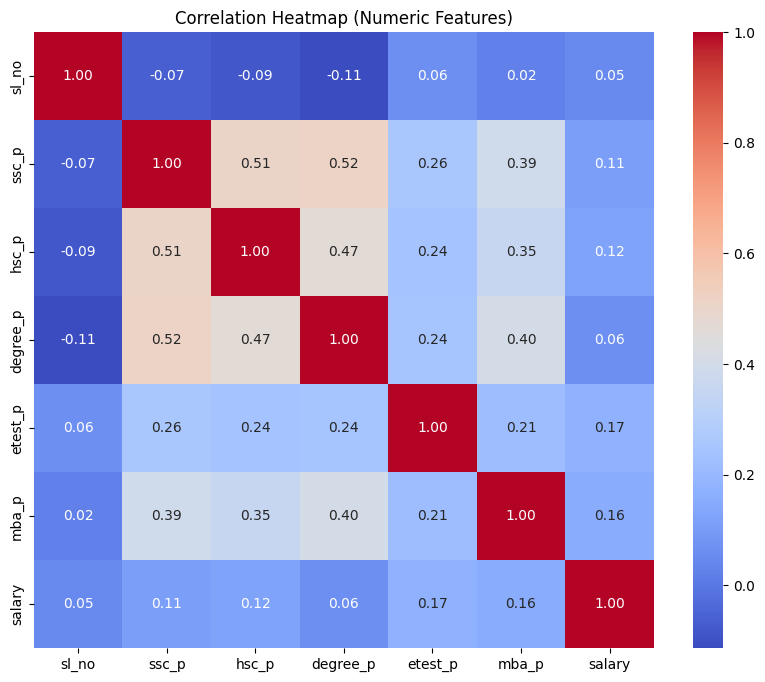

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()
                     # display the plot


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,  random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 42379.93
Mean Squared Error (MSE): 5873007539.24
Root Mean Squared Error (RMSE): 76635.55
R-squared (R2): 0.01
